# **TikTok Project**

### Issue:
The TikTok data team seeks to develop a machine learning model to assist in the classification of claims for user submissions. 

In [194]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
# Load and display dataset

ttdata = pd.read_csv("tiktok_dataset.csv")
ttdata.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [196]:
# Summary information and statistic

ttdata.info(),
ttdata.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


#### Obeservation: The insights from the summary statistics

1. Video Duration: Videos vary significantly in length, with an average duration around 32 seconds.

2. Views: There is a wide range of viewership, with videos averaging about 254,709 views.

3. Likes: On average, videos receive around 84,305 likes, indicating a high level of engagement.

4. Shares: Videos are shared an average of 16,735 times, suggesting they are widely circulated.

5. Downloads: The average video is downloaded approximately 1,049 times.

6. Comments: There is an average of 349 comments per video, showing active audience interaction.

## Data Cleaning

In [197]:
# Handle Missing Values

# We will fill missing 'claim_status' and 'video_transcription_text' with 'unknown'
ttdata['claim_status'].fillna('unknown', inplace=True)
ttdata['video_transcription_text'].fillna('unknown', inplace=True)

# For numerical columns with missing values (engagement metrics), we'll use median to fill missing values
numeric_cols = ['video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']
ttdata[numeric_cols] = ttdata[numeric_cols].fillna(ttdata[numeric_cols].median())


In [198]:
# Data Type Corrections

# From the initial inspection, it seems the data types are appropriate for analysis. 
categorical_cols = ['claim_status', 'verified_status', 'author_ban_status']
ttdata[categorical_cols] = ttdata[categorical_cols].astype('category')

ttdata

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19377,19378,unknown,7578226840,21,unknown,not verified,active,9954.5,3403.5,717.0,46.0,9.0
19378,19379,unknown,6079236179,53,unknown,not verified,active,9954.5,3403.5,717.0,46.0,9.0
19379,19380,unknown,2565539685,10,unknown,verified,under review,9954.5,3403.5,717.0,46.0,9.0
19380,19381,unknown,2969178540,24,unknown,not verified,active,9954.5,3403.5,717.0,46.0,9.0


In [199]:
# Recheck the dataset information to confirm changes
ttdata.info(), 
ttdata.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   #                         19382 non-null  int64   
 1   claim_status              19382 non-null  category
 2   video_id                  19382 non-null  int64   
 3   video_duration_sec        19382 non-null  int64   
 4   video_transcription_text  19382 non-null  object  
 5   verified_status           19382 non-null  category
 6   author_ban_status         19382 non-null  category
 7   video_view_count          19382 non-null  float64 
 8   video_like_count          19382 non-null  float64 
 9   video_share_count         19382 non-null  float64 
 10  video_download_count      19382 non-null  float64 
 11  video_comment_count       19382 non-null  float64 
dtypes: category(3), float64(5), int64(3), object(1)
memory usage: 1.4+ MB


,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19382.000000,19382.000000,19382.000000,19382.000000,19382.000000
mean,9691.500000,5.627454e+09,32.421732,250945.442937,83060.773759,16488.966309,1034.001806,344.079816
std,5595.245794,2.536440e+09,16.229967,321813.461011,132764.541002,31849.968548,1992.659853,794.571564
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,5026.250000,833.000000,119.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,496858.000000,122187.500000,17713.750000,1121.750000,281.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [200]:
# The average view count of videos with "claim" status

claims = ttdata[ttdata['claim_status'] == 'claim']
mean_view_count = round(claims['video_view_count'].mean())
median_view_count = round(claims['video_view_count'].median())


print('Mean view count for claims:', mean_view_count)
print('Median view count for claims', median_view_count)

Mean view count for claims: 501029
Median view count for claims 501555


#### Observation:
These values are very close to each other suggests a relatively symmetric distribution of view counts for these videos, indicating that there are no extreme outliers skewing the average view count significantly away from the median. 

This implies that the majority of "claim" videos have a view count around the 500,000 mark, showing a consistent level of engagement across these videos.

## Data Exploratory

In [201]:
# Investigation the different values for claim status and 
# how many of each are in the data?

ttdata['claim_status'].value_counts()

claim_status
claim      9608
opinion    9476
unknown     298
Name: count, dtype: int64

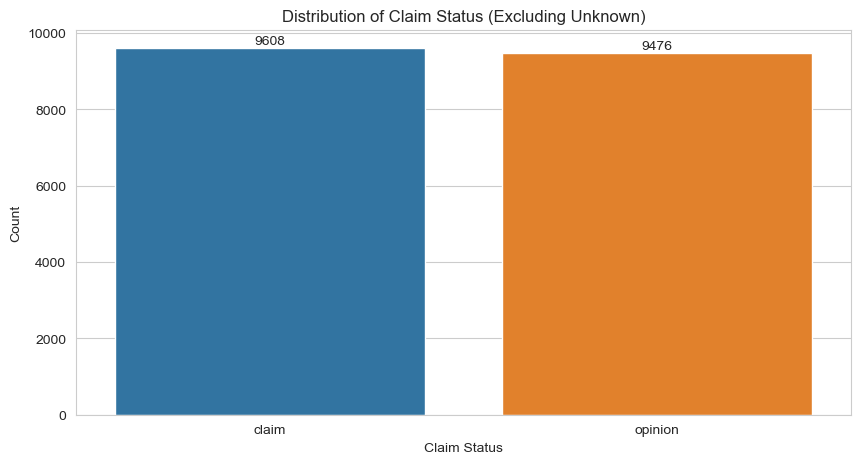

In [202]:
# Filtering out the 'unknown' claim statuses from the DataFrame
filtered_ttdata = ttdata[ttdata['claim_status'] != 'unknown']

# The count of the claim statuses (excluding unknown).
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='claim_status', data=filtered_ttdata, order=['claim', 'opinion'])
plt.title('Distribution of Claim Status (Excluding Unknown)')
plt.xlabel('Claim Status')
plt.ylabel('Count')

# Adding the count numbers above the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

#### Observation:
The dataset has a nearly equal number of 'claim' and 'opinion' videos, indicating a balanced classification distribution.

In [203]:
# counts for each group combination of claim status 
# and author ban status

ttdata.groupby(['claim_status','author_ban_status']).size()


claim_status  author_ban_status
claim         active               6566
              banned               1439
              under review         1603
opinion       active               8817
              banned                196
              under review          463
unknown       active                280
              banned                  4
              under review           14
dtype: int64

#### Observation:
The data above suggests that there are significantly more banned authors among those who posted claim videos compared to those who posted opinion videos. 

This could indicate stricter regulation or different standards for claim videos versus opinion videos. However, it's unclear if claim videos are inherently more likely to lead to bans or if authors of claim videos tend to violate terms of service more often. 

Importantly, while this data can inform about the status of authors (banned or active), it does not include the depth details and reasons for bans or the compliance of individual videos with terms of service.

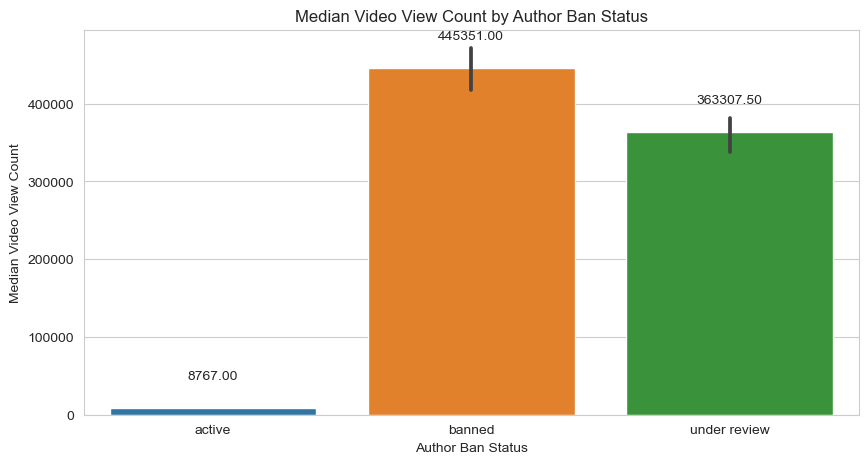

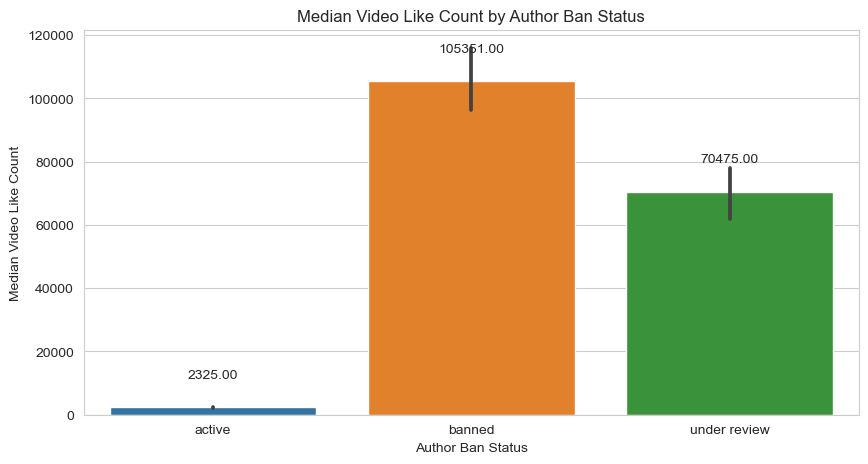

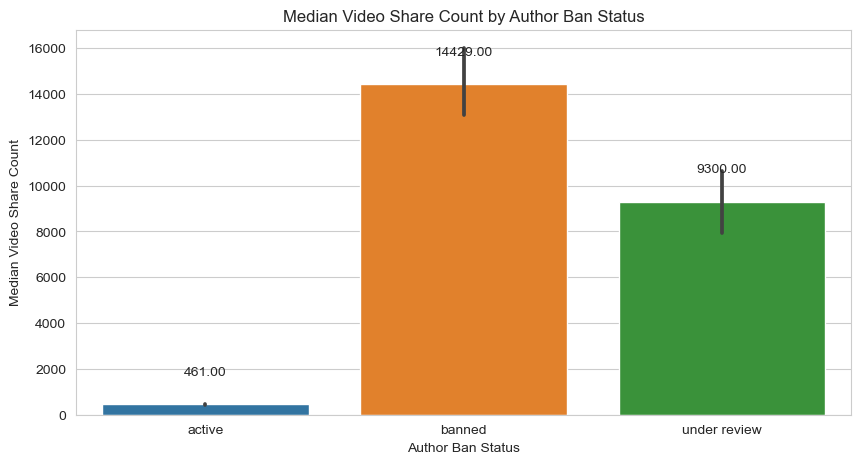

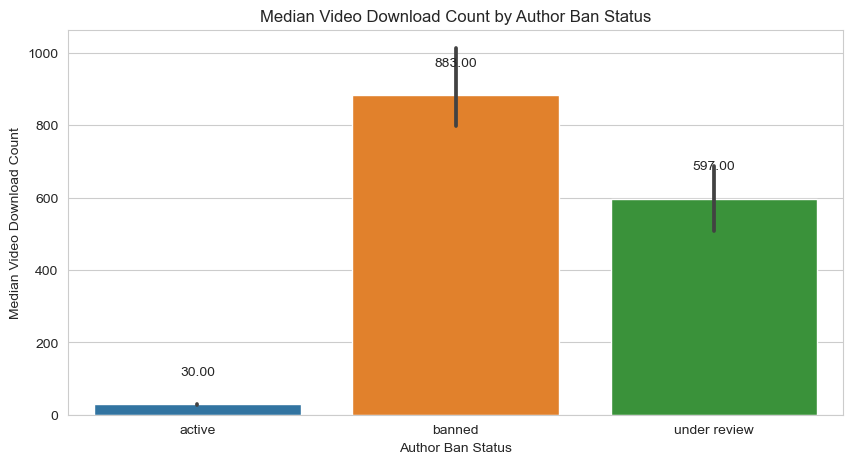

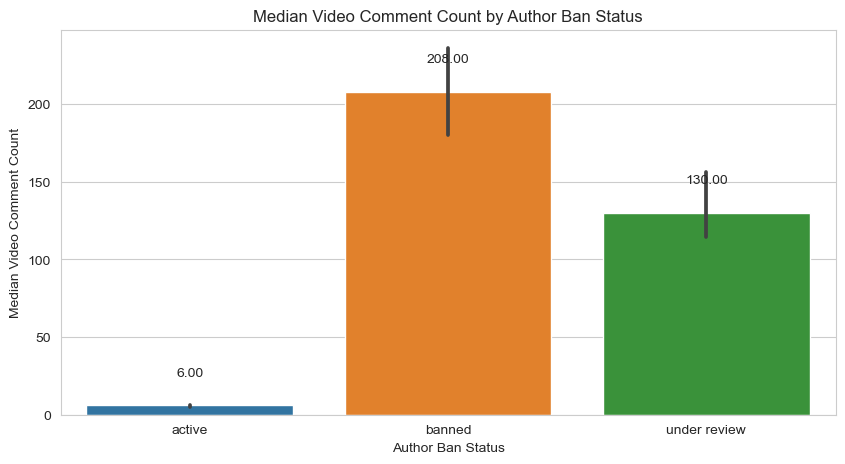

In [204]:
# The impact of Author Ban Status on Engagement using the median engagement metrics by author ban status

for metric in engagement_metrics:
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(x='author_ban_status', y=metric, data=ttdata, estimator=np.median)
    plt.title(f'Median {metric.replace("_", " ").title()} by Author Ban Status')
    plt.xlabel('Author Ban Status')
    plt.ylabel(f'Median {metric.replace("_", " ").title()}')

    # Adding the count numbers above the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 23), textcoords='offset points')
    
    plt.show()

#### Observation:
The data above suggests that there are significantly more banned authors among those who posted claim videos compared to those who posted opinion videos. 

This could indicate stricter regulation or different standards for claim videos versus opinion videos. However, it's unclear if claim videos are inherently more likely to lead to bans or if authors of claim videos tend to violate terms of service more often. 

Importantly, while this data can inform about the status of authors (banned or active), it does not include the depth details and reasons for bans or the compliance of individual videos with terms of service.

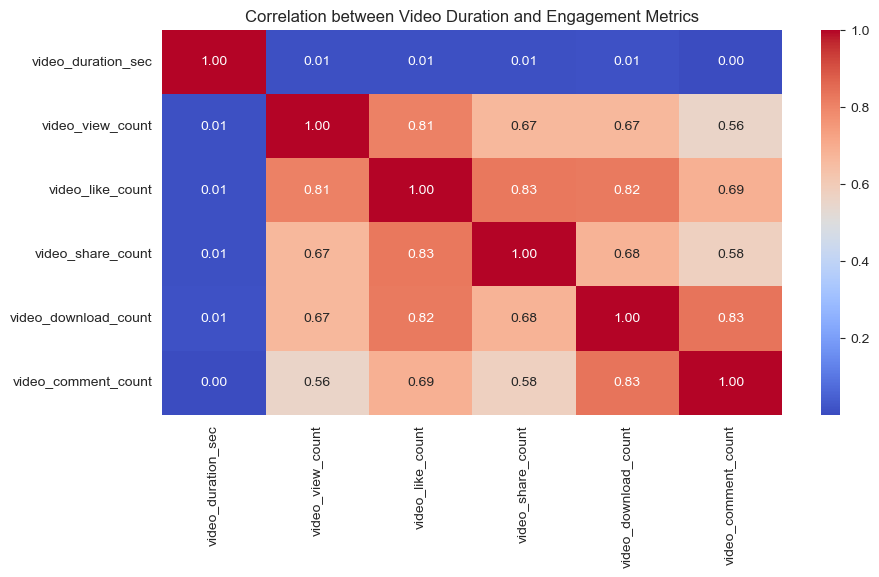

In [205]:
# Correlation between Video Duration and Engagement Metrics
plt.figure(figsize=(10, 5))
sns.heatmap(ttdata[['video_duration_sec'] + engagement_metrics].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation between Video Duration and Engagement Metrics')
plt.show()


#### Observation:
#### - Video Duration: 
There is virtually no correlation between video duration and any of the engagement metrics, as indicated by the correlation coefficients close to 0. This suggests that the length of a video does not significantly influence how much engagement (views, likes, shares, downloads, comments) it will receive.


#### - Engagement Metrics: 
There are strong positive correlations between the various engagement metrics themselves (like count with view count, share count with like count, etc.). This indicates that when a video receives a high number of views, it is also likely to receive a high number of likes, shares, downloads, and comments, and vice versa.

#### - Implication: 
The engagement metrics are interrelated, videos that perform well on one metric tend to perform well on others. However, these metrics do not appear to be influenced by the duration of the video within this dataset.



## My Analysis

#### 1. Claim Status
The graph shows a close count between videos labeled as 'claim' and those labeled as 'opinion', indicating a nearly balanced dataset with respect to these two categories. This also suggests that for the videos classified, there is no significant skew towards one type of content over the other. This balance is beneficial for machine learning classification tasks as it provides a more equal representation of classes.

#### 2. The impact of Author Ban Status 
#### - Video View Count: 
Banned authors tend to have higher median view counts compared to active authors. This suggests that videos from banned authors may receive more attention, which could be due to various factors including the nature of the content or a heightened audience curiosity following a ban.

#### - Video Like Count: 
Similar to view counts, banned authors have a higher median like count. This indicates that despite the ban, or perhaps because of it, their content is well-received by viewers who interact with it through likes.

#### - Video Share Count:
The trend continues with share counts, where banned authors have a notably higher median share count. This could imply that their videos are shared more widely, possibly due to being controversial or highly engaging.

#### - Video Download Count: 
Banned authors also see higher median download counts. This could suggest that viewers are keen to save content from these authors, potentially due to the perceived risk of the content being taken down or as a means to view it offline.

#### - Video Comment Count: 
Once again, banned authors lead with higher median comment counts, indicating a higher level of viewer engagement in terms of discussions or reactions to the content.

Across all these engagement metrics, the consistent pattern is that banned authors receive higher median engagement on their videos. This could be due to a variety of reasons, such as the content being more provocative or contentious, thus drawing more views, or perhaps the audience's reaction to the author's ban status. It's also possible that the content from these authors goes viral, leading to increased engagement.

It's important to note that while these charts provide quantitative insights, they do not reveal the qualitative aspects behind why these differences exist. Further investigation, possibly including content analysis and understanding the context of the bans, would be necessary to draw more nuanced conclusions.


#### 3. The Correlation 
The longer videos tend to get more views, likes, shares, downloads, and comments: A positive correlation would suggest that as videos get longer, they tend to engage users more, potentially because they provide more content or are more in-depth.

A diminishing return on engagement with increasing video length: If the correlation starts strong and gets weaker as the video duration increases, it might indicate that there's an optimal video length for maximizing engagement.

Which engagement metric is most closely related to video duration: By comparing the correlation coefficients, you can determine which type of engagement (e.g., likes, shares) is most strongly affected by the length of the video.